In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
X_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)



X_train =X_train/255
x_test = x_test/255


In [ ]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", x_test.shape)
print("Shape of y_test", y_test.shape)



Shape of X_train (2000, 100, 100, 3)
Shape of y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of y_test (400, 1)
Shape of x_unknown (24, 100, 100, 3)
Shape of y_unknown (24, 1)


In [6]:
X_train[1,:]


array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [ ]:
class_names = ['Cat','Dog']

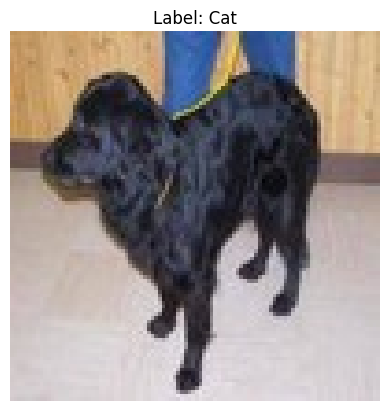

In [14]:
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx])
label = int(y_train[idx][0])
plt.title(f"Label: {class_names[label]}")
plt.axis('off')
plt.show()

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\SATWIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add( Dense(1,activation='sigmoid'))


In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [14]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=5,
    validation_data=(x_test, y_test),
)

c:\Users\SATWIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5726 - loss: 0.6895 - val_accuracy: 0.7675 - val_loss: 0.5531
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7088 - loss: 0.5760 - val_accuracy: 0.7725 - val_loss: 0.4916
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.7573 - loss: 0.5228 - val_accuracy: 0.8050 - val_loss: 0.4651
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7657 - loss: 0.4861 - val_accuracy: 0.8175 - val_loss: 0.4282
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.7817 - loss: 0.4639 - val_accuracy: 0.8175 - val_loss: 0.4108


In [22]:
print(np.unique(y_train))  # Should print [0. 1.]
print(np.unique(y_test))   # Should print [0. 1.]


[0. 1.]
[0. 1.]


In [18]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 502ms/step - accuracy: 0.8078 - loss: 0.4149


[0.41083571314811707, 0.8174999952316284]

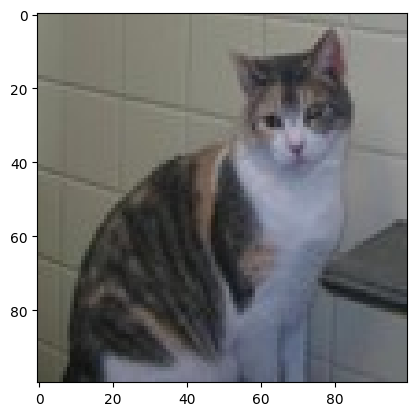

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Our model say it is a: Cat
Test Loss: 0.4108
Test Accuracy: 0.8175


In [24]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred>0.5
if y_pred[0][0] ==0:
    pred = 'Dog'
else:
    pred = 'Cat'

print("Our model say it is a:",pred)


loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")


In [25]:
model.save('IC.keras')

In [27]:
import numpy as np

np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)
